In [1]:
import os
import pandas as pd
import geopandas as gpd

# os.environ["USE_PYGEOS"] = os.environ.get("USE_PYGEOS", "0")
local_crs = 32636
# path to data
example_data_path = "./data"

In [2]:
# load aggregated info we have
aggregated_blocks = gpd.read_parquet(os.path.join(example_data_path, "data_getter_blocks.parquet"))
accessibility_matrix = pd.read_pickle(os.path.join(example_data_path, "data_getter_matrix.pickle"))

In [3]:
# load data required for service graphs creation
schools = gpd.read_parquet(os.path.join(example_data_path, "schools.parquet"))
kindergartens = gpd.read_parquet(os.path.join(example_data_path, "kindergartens.parquet"))
recreational_areas = gpd.read_parquet(os.path.join(example_data_path, "recreational_areas.parquet")).rename_geometry('geometry')

hospitals = gpd.read_file(os.path.join(example_data_path, "hospitals.geojson"))
pharmacies = gpd.read_file(os.path.join(example_data_path, "pharmacies.geojson"))
policlinics = gpd.read_file(os.path.join(example_data_path, "policlinics.geojson"))

# services should be specified as a dictionary
services = {"kindergartens": kindergartens}

In [4]:
# services = {"schools": schools, "kindergartens": kindergartens, "recreational_areas": recreational_areas,
#             "hospitals": hospitals, "pharmacies": pharmacies, "policlinics": policlinics}

In [5]:
from masterplan_tools import CityModel

city_model = CityModel(
  blocks=aggregated_blocks, 
  accessibility_matrix=accessibility_matrix, 
  services=services
)

/Users/mvin/Desktop/masterplanning/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# city_model.visualize()

In [7]:
from masterplan_tools import ProvisionModel

services_prov = {}

for service_type in city_model.get_service_types():
    provision = ProvisionModel(city_model=city_model, service_name=service_type)
    services_prov[service_type] = provision.run(overflow=True)
    print(service_type)

12709.655
10459
9310.655
7060
1
7560.655000000001
5310
2
6323.655000000001
4073
3
5517.655000000001
3267
4
4780.655000000001
2530
5
4440.655000000001
2190
6
4193.655000000001
1943
7
3973.6550000000007
1723
8
3773.6550000000007
1523
9
3595.6550000000007
1345
10
3445.6550000000007
1195
11
3330.6550000000007
1080
12
3215.6550000000007
965
13
3122.6550000000007
872
14
3034.6550000000007
784
15
2946.6550000000007
696
16
2858.6550000000007
608
17
2773.6550000000007
523
18
2696.6550000000007
446
19
2620.6550000000007
370
20
kindergartens


In [18]:

services_prov["kindergartens"]["population_prov_kindergartens"].sum()


552

In [8]:
services_prov["kindergartens"][services_prov["kindergartens"]['population'] > 0]

,geometry,landuse,block_id,is_living,current_population,floors,current_living_area,current_green_capacity,current_green_area,current_parking_capacity,current_industrial_area,area,provision_kindergartens,population_prov_kindergartens,population_unprov_kindergartens,population,demand_kindergartens
15,"POLYGON ((344864.533 6647854.355, 344855.596 6...",buildings,15,True,3375.0,1.0,11360.040,0.0,0.0,3004.0,3427.28270,65429.054626,6,12,193,3375,0
16,"POLYGON ((344272.022 6648285.316, 344278.598 6...",buildings,16,True,3946.0,3.5,19338.336,4095.0,1900.0,44.0,7108.81950,102276.415413,5,13,227,3946,22
17,"POLYGON ((344477.431 6648686.065, 344490.134 6...",buildings,17,True,6026.0,2.0,32985.934,71444.0,43427.0,2911.0,30788.58880,338912.554925,3,14,353,6026,132
18,"POLYGON ((344059.128 6648753.606, 344059.172 6...",buildings,18,True,4222.0,1.0,19467.875,12479.0,11708.0,128.0,8921.20723,158850.983702,5,14,243,4222,24
20,"POLYGON ((344542.320 6648943.596, 344542.403 6...",buildings,20,True,5956.0,9.0,31287.166,41360.0,7509.0,0.0,6385.50440,248549.074482,3,13,350,5956,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,"POLYGON ((347453.321 6648682.033, 347460.150 6...",selected_area,345,True,34.0,0.0,234.938,0.0,0.0,0.0,8543.41300,12372.147877,8,0,1,34,0
349,"POLYGON ((347767.514 6648786.017, 347767.265 6...",selected_area,349,True,81.0,4.0,1164.096,0.0,0.0,0.0,4244.02400,7699.668651,6,0,4,81,0
577,"POLYGON ((345759.141 6646404.365, 345765.205 6...",no_dev_area,577,True,514.0,0.0,4275.080,0.0,0.0,0.0,2354.81730,45802.171771,6,1,29,514,0
586,"POLYGON ((346705.434 6646947.258, 346717.592 6...",no_dev_area,586,True,72.0,2.0,662.390,11861.0,2153.0,0.0,42521.46270,87752.190003,6,0,4,72,0


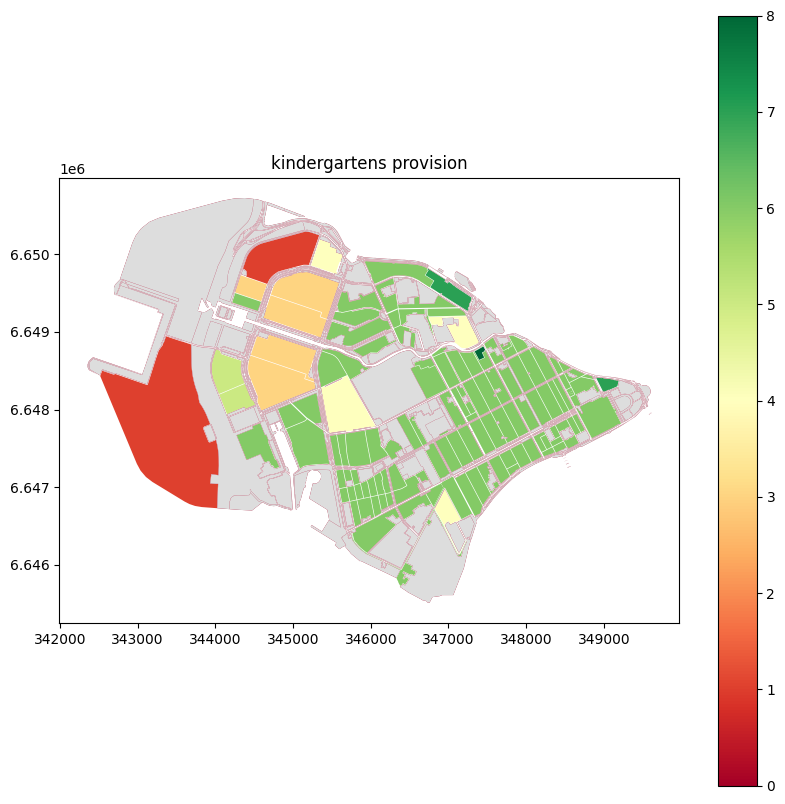

In [9]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(1, 1, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
services_prov["kindergartens"].plot(column="provision_kindergartens", legend=True, ax=ax1, cmap='RdYlGn')
ax1.set_title('kindergartens provision')
services_prov["kindergartens"][services_prov["kindergartens"]["population"] == 0].plot(ax=ax1, color="#ddd", alpha=1)

plt.show()


In [10]:
# import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec

# def show_me_chart(fig, gs, prov, name, i):
#   ax = fig.add_subplot(gs[i//3, i%3])
#   prov.plot(column="provision_"+name, legend=True, ax=ax, cmap='RdYlGn')
#   ax.set_title(name +" provision")
#   prov[prov["population"] == 0].plot(ax=ax, color="#ddd", alpha=1)


# kindergartens_prov = services_prov["kindergartens"]
# schools_prov = services_prov["schools"]
# recreational_areas_prov = services_prov["recreational_areas"]
# hospitals_prov = services_prov["hospitals"]
# pharmacies_prov = services_prov["pharmacies"]
# policlinics_prov = services_prov["policlinics"]

# fig = plt.figure(figsize=(25, 15))
# gs = GridSpec(2, 3, figure=fig)

# i = 0
# for service_type in services_prov:
#   show_me_chart(fig, gs, services_prov[service_type], service_type, i)
#   i = i+1

# plt.show()

In [11]:
df_filtered_1 = services_prov["kindergartens"][services_prov["kindergartens"]["provision_kindergartens"] > 0]
kindergartens_all = df_filtered_1["provision_kindergartens"].sum(numeric_only=True) / len(df_filtered_1)

df_filtered_2 = services_prov["schools"][services_prov["schools"]["provision_schools"] > 0]
schools_all = df_filtered_2["provision_schools"].sum(numeric_only=True) / len(df_filtered_2)

df_filtered_3 = services_prov["recreational_areas"][
    services_prov["recreational_areas"]["provision_recreational_areas"] > 0
]
recreational_areas_all = df_filtered_3["provision_recreational_areas"].sum(numeric_only=True) / len(df_filtered_3)
total_prov = (kindergartens_all + schools_all + recreational_areas_all) / 3

print(f"Total provision before {total_prov}")

KeyError: 'schools'